In [14]:
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [4]:
outputs_path = os.path.join(os.getcwd(), 'data', 'outputs')

In [48]:
dataset = "simulation1"
models = os.listdir(os.path.join(outputs_path, dataset))
all_test_data = []
agg_metrics = []
all_metrics_by_true_cov = []
all_diff_by_true_cov = []
# for model in models:
model = "sdne_100_1_1_100"

# load data
data = load_pickle(os.path.join(outputs_path, dataset, model, 'results.pkl'))

In [49]:
data.keys()

dict_keys(['args', 'train_results', 'test_results', 'train_total_loss', 'train_local_loss', 'train_global_loss', 'train_reg_loss'])

In [50]:
train_total_loss_df = pd.DataFrame(torch.vstack([torch.hstack(data["train_total_loss"][i]) for i in range(len(data["train_total_loss"]))]).numpy(),
                                   columns=["Loss 1", "Loss 2"])
train_local_loss_df = pd.DataFrame(torch.vstack([torch.hstack(data["train_local_loss"][i]) for i in range(len(data["train_local_loss"]))]).numpy(),
                                   columns=["Loss 1", "Loss 2"])
train_global_loss_df = pd.DataFrame(torch.vstack([torch.hstack(data["train_global_loss"][i]) for i in range(len(data["train_global_loss"]))]).numpy(),
                                    columns=["Loss 1", "Loss 2"])
train_reg_loss_df = pd.DataFrame(torch.vstack([torch.hstack(data["train_reg_loss"][i]) for i in range(len(data["train_reg_loss"]))]).numpy(),
                                    columns=["Loss 1", "Loss 2"])

In [56]:
loss1_df = pd.concat([train_total_loss_df["Loss 1"], train_local_loss_df["Loss 1"], train_global_loss_df["Loss 1"], train_reg_loss_df["Loss 1"]], axis=1)
loss1_df.columns = ["Total", "Local", "Global", "Reg"]

loss2_df = pd.concat([train_total_loss_df["Loss 2"], train_local_loss_df["Loss 2"], train_global_loss_df["Loss 2"], train_reg_loss_df["Loss 2"]], axis=1)
loss2_df.columns = ["Total", "Local", "Global", "Reg"]

In [68]:
loss2_df

,Total,Local,Global,Reg
0,1.524066e+16,1.524066e+16,1.524066e+16,1.524066e+16
1,3.158172e+17,3.158172e+17,3.158172e+17,3.158172e+17
2,1.781029e+18,1.781029e+18,1.781029e+18,1.781029e+18
3,8.605092e+18,8.605092e+18,8.605092e+18,8.605092e+18
4,2.160978e+19,2.160978e+19,2.160978e+19,2.160978e+19
...,...,...,...,...
95,2.497099e+23,2.497099e+23,2.497099e+23,2.497099e+23
96,2.064374e+23,2.064374e+23,2.064374e+23,2.064374e+23
97,2.407225e+23,2.407225e+23,2.407225e+23,2.407225e+23
98,2.079367e+23,2.079367e+23,2.079367e+23,2.079367e+23


In [69]:
train_total_loss_df["Loss 2"]

0     1.524066e+16
1     3.158172e+17
2     1.781029e+18
3     8.605092e+18
4     2.160978e+19
          ...     
95    2.497099e+23
96    2.064374e+23
97    2.407225e+23
98    2.079367e+23
99    2.001399e+23
Name: Loss 2, Length: 100, dtype: float32

In [70]:
train_reg_loss_df["Loss 2"]

0     1.524066e+16
1     3.158172e+17
2     1.781029e+18
3     8.605092e+18
4     2.160978e+19
          ...     
95    2.497099e+23
96    2.064374e+23
97    2.407225e+23
98    2.079367e+23
99    2.001399e+23
Name: Loss 2, Length: 100, dtype: float32

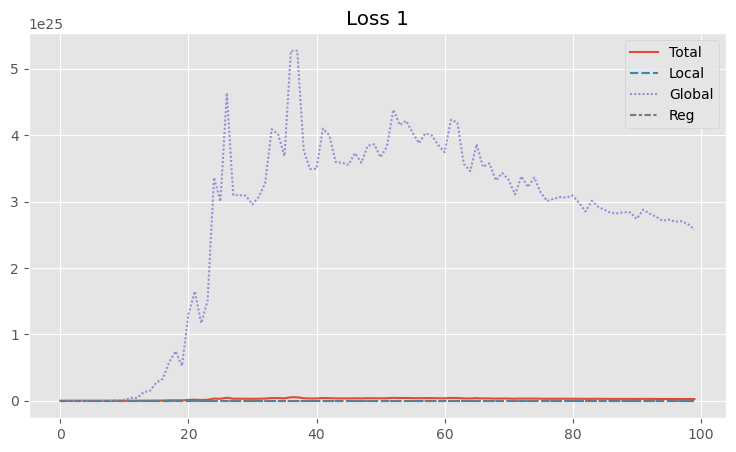

In [61]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=loss1_df)
plt.title("Loss 1")
plt.show()

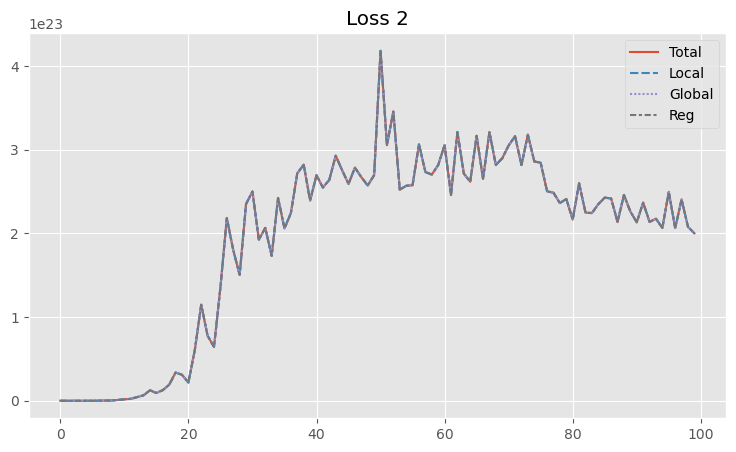

In [62]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=loss2_df)
plt.title("Loss 2")
plt.show()

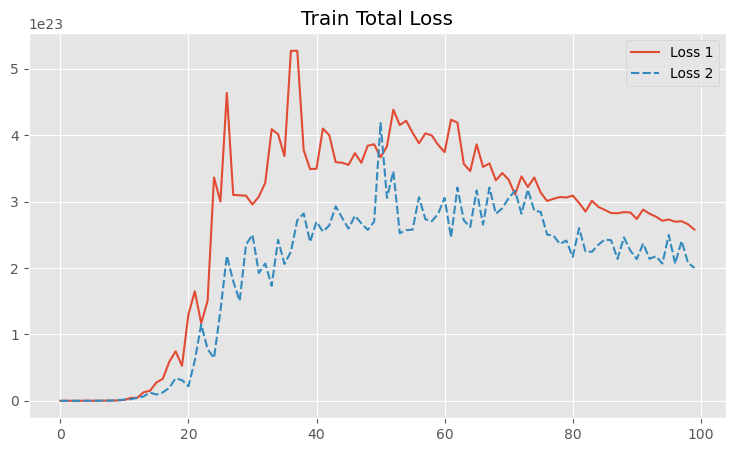

In [63]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_total_loss_df)
plt.title("Train Total Loss")
plt.show()

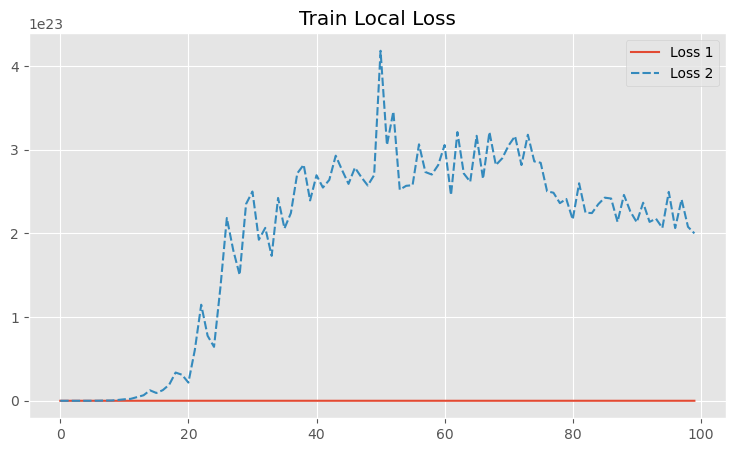

In [64]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_local_loss_df)
plt.title("Train Local Loss")
plt.show()

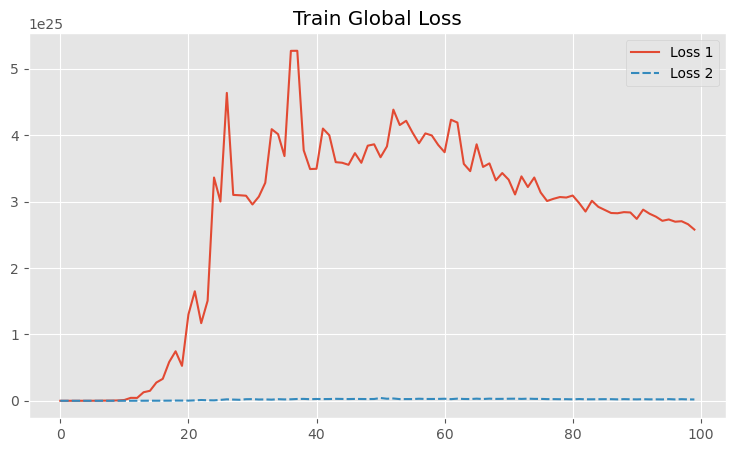

In [65]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_global_loss_df)
plt.title("Train Global Loss")
plt.show()

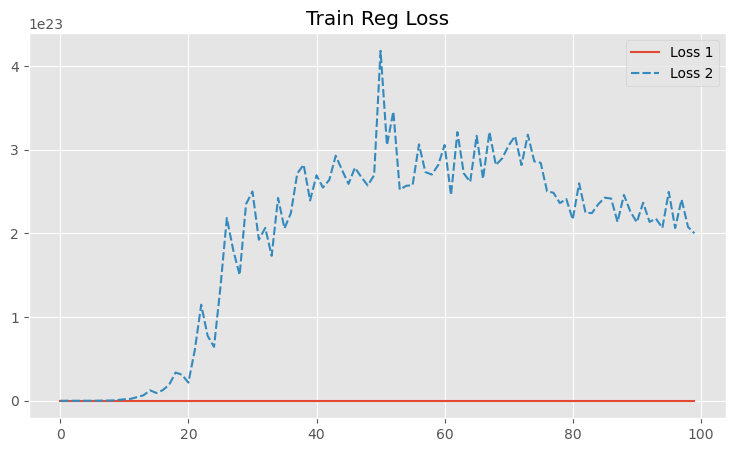

In [66]:
plt.figure(figsize=(9, 5))
sns.lineplot(data=train_reg_loss_df)
plt.title("Train Reg Loss")
plt.show()